I have had some issues plotting asymmetric errorbars using matplotlib's errorbar function. In this notebook I show how to properly use plt.errorbar using data in:
    
    - list format
    - array format
    - dataframe format
    - float format, a single data point
    
I also show some of the issues I've had with plt.errorbar
    

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Example 1 -- as lists

<Container object of 3 artists>

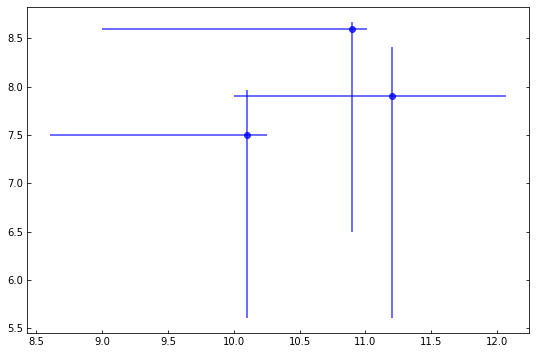

In [2]:
x     = [ 10.9 ,  10.1,  11.2]
xerrL = [ 1.9,  1.5,  1.2 ]
xerrU = [ 0.11,  0.15,  0.87]

y     = [ 8.6,  7.5,  7.9]
yerrL = [2.1, 1.9, 2.3]
yerrU = [ 0.07,  0.47,  0.51]

plt.figure(figsize=(9,6))
plt.errorbar(x, y, xerr=[xerrL, xerrU], yerr=[yerrL, yerrU],
             fmt='o', color='blue', capsize=None, alpha=0.75)

<Container object of 3 artists>

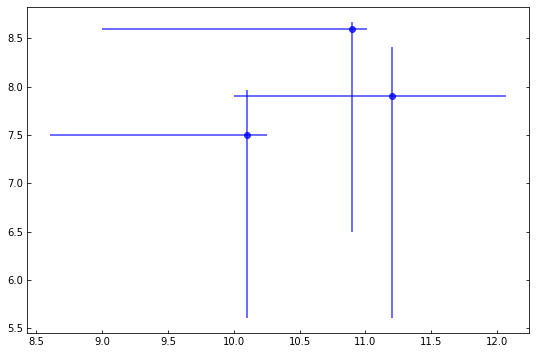

In [3]:
xerr = [xerrL, xerrU]
yerr = [yerrL, yerrU]

plt.figure(figsize=(9,6))
plt.errorbar(x, y, xerr=xerr, yerr=yerr,
             fmt='o', color='blue', capsize=None, alpha=0.75)

In [4]:
xerr

[[1.9, 1.5, 1.2], [0.11, 0.15, 0.87]]

# Example 2 -- as arrays

<Container object of 3 artists>

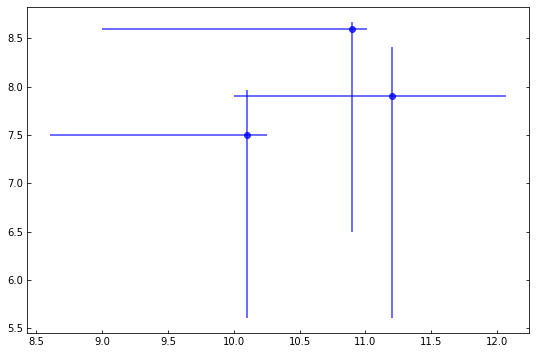

In [5]:
xerr = np.asarray([xerrL, xerrU])
yerr = np.asarray([yerrL, yerrU])

plt.figure(figsize=(9,6))
plt.errorbar(x, y, xerr=xerr, yerr=yerr,
             fmt='o', color='blue', capsize=None, alpha=0.75)

In [6]:
xerr

array([[ 1.9 ,  1.5 ,  1.2 ],
       [ 0.11,  0.15,  0.87]])

<Container object of 3 artists>

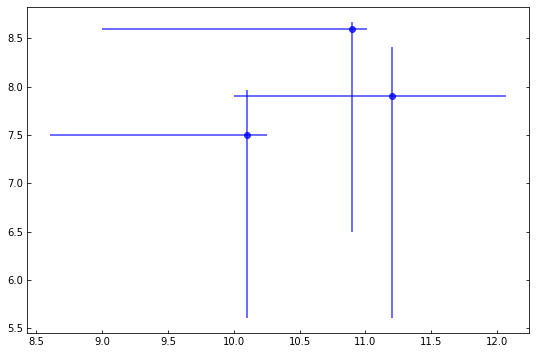

In [7]:
xerr = np.asarray(xerrL), np.asarray(xerrU)
yerr = np.asarray(yerrL), np.asarray(yerrU)

plt.figure(figsize=(9,6))
plt.errorbar(x, y, xerr=xerr, yerr=yerr,
             fmt='o', color='blue', capsize=None, alpha=0.75)

In [8]:
xerr

(array([ 1.9,  1.5,  1.2]), array([ 0.11,  0.15,  0.87]))

# Example 3 -- As Pandas Dataframe

<Container object of 3 artists>

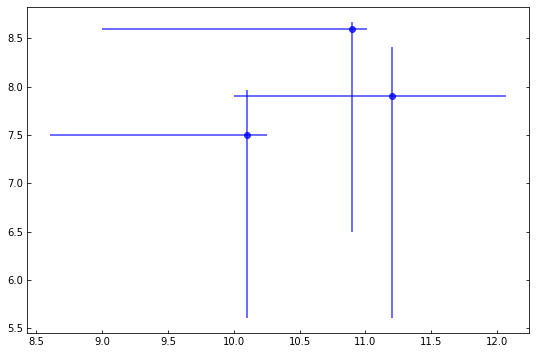

In [9]:
# WITH PANDAS DATAFRAME. NOTICE HOW THE DATA IS LISTED IN ROWS. 
df = pd.DataFrame([
                  [10.9, 1.9, 0.11, 8.6, 2.1, 0.07],
                  [10.1, 1.5, 0.15, 7.5, 1.9, 0.47],
                  [11.2, 1.2, 0.87, 7.9, 2.3, 0.51]],
                  columns=['x', 'xerrL', 'xerrU', 'y', 'yerrL', 'yerrU'])

plt.figure(figsize=(9,6))
plt.errorbar(df.x, df.y, xerr=[df.xerrL, df.xerrU], yerr=[df.yerrL, df.yerrU],
             fmt='o', color='blue', capsize=None, alpha=0.75)

In [10]:
[df.xerrL, df.xerrU]

[0    1.9
 1    1.5
 2    1.2
 Name: xerrL, dtype: float64, 0    0.11
 1    0.15
 2    0.87
 Name: xerrU, dtype: float64]

# Example 4 -- as a single data point.

#### This is where things get tricky and problems crop up.

## *Potential Problem #1*
When a single data point is plotted, you can no longer use the same format. Try the following code:

    plt.figure(figsize=(9,6))
    plt.errorbar(x=10.9, y=8.6, xerr=[1.9, 0.11], yerr=[2.1, 0.07],
                 fmt='o', color='blue', capsize=None, alpha=0.75)

and find you get an error: 
    
    ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]

First instinct would then be to nest the list of values. 

    plt.figure(figsize=(9,6))
    plt.errorbar(x=10.9, y=8.6, xerr=[[1.9, 0.11]], yerr=[[2.1, 0.07]],
                 fmt='o', color='blue', capsize=None, alpha=0.75)
                 
but this also gives you an error: 
    
    TypeError: unsupported operand type(s) for -: 'float' and 'list'

This solution is close, but to get the correct errorbars you need to:
    1. Nest the lists
    2. transform nested lists into numpy arrays
    3. transpose the arrays
Neglecting ANY of these steps will either throw an error or provide an unexpected consequence  (you'll see one when using pandas data in a minute, but for now we stick to float values). 
    
#### The correct way is:

    plt.figure(figsize=(9,6))
    plt.errorbar(x=10.9, y=8.6, 
                 xerr = np.transpose(np.asarray( [[1.9, 0.11]] )), 
                 yerr = np.transpose(np.asarray( [[2.1, 0.07]] )),
                 fmt='o', color='blue', capsize=None, alpha=0.75)
                 

The plt.errorbar function requires xerr and yerr to be 2D arrays, meaning a shape of (n, p) where neither n or p are zero. 

This is a shape of (2, 1); 2 rows and 1 column. Try it:

    np.transpose(np.asarray([[1.9, 0.11]])).shape  # prints (2, 1)

Doing the transpose stacks the lower and upper errors to give the following form:

    array([[ lower_moe ],
           [ upper_moe ]])
           
which is 2 rows and 1 column.


#### WARNING WHNE USING PANDAS 

If you routinely use pandas dataframes and you choose to only plot a single data point, you may do something like the following:

    plt.figure(figsize=(9,6))
    plt.errorbar(x=df.x[0], y=df.y[0], 
                 xerr = [df.xerrL[0], df.xerrU[0]], 
                 yerr = [df.yerrL[0], df.yerrU[0]], 
                 fmt='o', color='blue', capsize=None, alpha=0.75)

Again, we'd get the same ValueError:
    
    ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]
    
However, if we nest the errors without transforming them to numpy arrays and taking the transpose, we DO NOT get an error! We get a plot!

    plt.figure(figsize=(9,6))
    plt.errorbar(x=df.x[0], y=df.y[0], 
                 xerr = [[df.xerrL[0], df.xerrU[0]]], 
                 yerr = [[df.yerrL[0], df.yerrU[0]]], 
                 fmt='o', color='blue', capsize=None, alpha=0.75)
                 
HOWEVER, this is still incorrect!!! This fucntion reognized ONLY the lower errorbars and uses those as the lower and upper errors; i.e., it plots symmetric error bars with only your lower errors. 

sometimes plt.errorbar plots only the lower errors and ignores the upper errors. This happens when the data is pulled from a pandas dataframe. 

#### This is the correct way:

    plt.figure(figsize=(9,6))
    plt.errorbar(x=df.x[0], y=df.y[0], 
                 xerr= np.transpose(np.asarray([[df.xerrL[0], df.xerrU[0]]])), 
                 yerr= np.transpose(np.asarray([[df.yerrL[0], df.yerrU[0]]])), 
                 fmt='o', color='blue', capsize=None, alpha=0.75)
                 

We will now plot both of the correct ways.

<Container object of 3 artists>

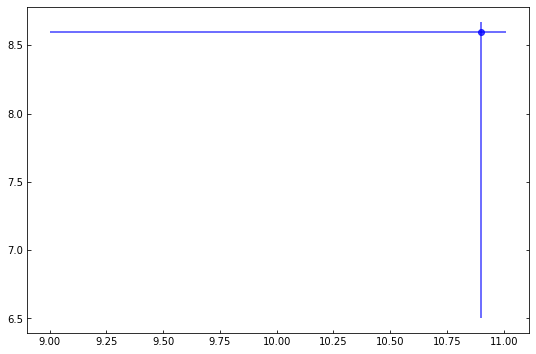

In [11]:
plt.figure(figsize=(9,6))
plt.errorbar(x=10.9, y=8.6, 
             xerr = np.transpose(np.asarray( [[1.9, 0.11]] )), 
             yerr = np.transpose(np.asarray( [[2.1, 0.07]] )),
             fmt='o', color='blue', capsize=None, alpha=0.75)

<Container object of 3 artists>

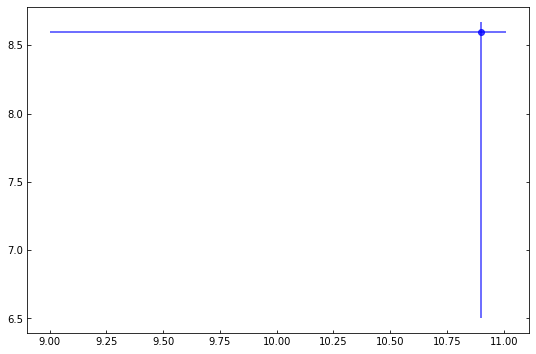

In [12]:
plt.figure(figsize=(9,6))
plt.errorbar(x=df.x[0], y=df.y[0], 
             xerr= np.transpose(np.asarray([[df.xerrL[0], df.xerrU[0]]])), 
             yerr= np.transpose(np.asarray([[df.yerrL[0], df.yerrU[0]]])), 
             fmt='o', color='blue', capsize=None, alpha=0.75)

#### Below is the problem I warned about, when using pandas:

<Container object of 3 artists>

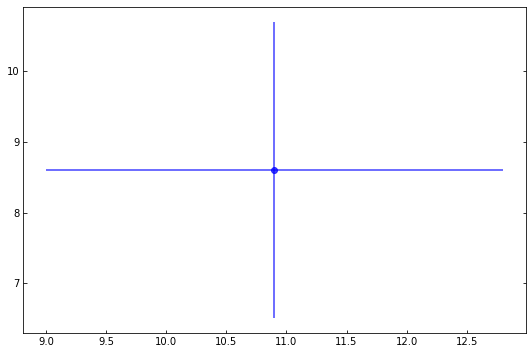

In [13]:
plt.figure(figsize=(9,6))
plt.errorbar(x=df.x[0], y=df.y[0], 
             xerr= [[df.xerrL[0], df.xerrU[0]]], 
             yerr= [[df.yerrL[0], df.yerrU[0]]], 
             fmt='o', color='blue', capsize=None, alpha=0.75)

This is not what was intended!

## *Potential Problem #2*

The order of the xerr and yerr matter.

    plt.errorbar(x, y, yerr=None, xerr=None, fmt=u'', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
    
yerr is requested first, so if you don't specify xerr and yerr, then python assumes you passed xerr first. For this particular function, you might want to get into the habit of specifying xerr and yerr.

See examples below.

<Container object of 3 artists>

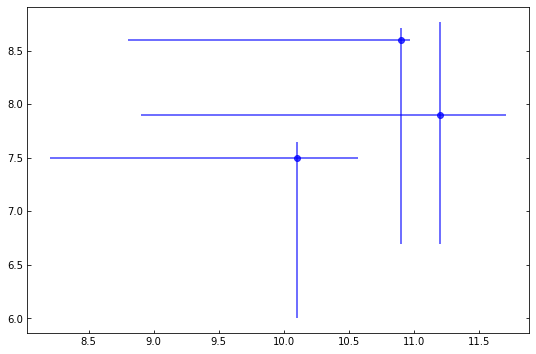

In [14]:
# WITHOUT SPECIFYING XERR AND YERR
plt.figure(figsize=(9,6))
plt.errorbar(df.x, df.y, 
             [df.xerrL, df.xerrU], 
             [df.yerrL, df.yerrU],
             fmt='o', color='blue', capsize=None, alpha=0.75)

<Container object of 3 artists>

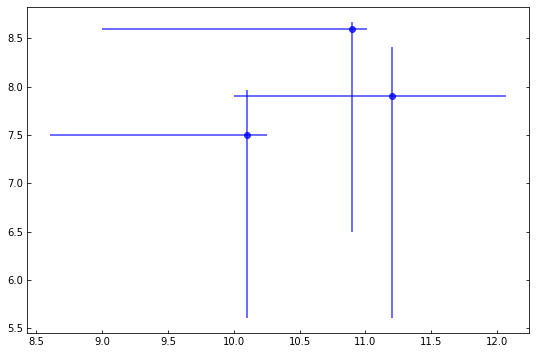

In [15]:
# WHEN XERR AND YERR ARE CORRECTLY SPECIFIED
plt.figure(figsize=(9,6))
plt.errorbar(x = df.x, y = df.y, 
             xerr = [df.xerrL, df.xerrU], 
             yerr = [df.yerrL, df.yerrU],
             fmt='o', color='blue', capsize=None, alpha=0.75)

The differences in this example are subtle, but clearly the y-errors were plotted under xerr and the y-errors were plotted under xerr.  